# Decision Tree for KickStarProject dataset

Goal: predict state

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%store -r data

In [3]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['category', 'main_category', 'currency', 'deadline', 'goal', 'launched',
       'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'continent', 'days_launched',
       'launched_month'],
      dtype='object')
(5000, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 372978 to 378660
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   category          5000 non-null   object        
 1   main_category     5000 non-null   object        
 2   currency          5000 non-null   object        
 3   deadline          5000 non-null   datetime64[ns]
 4   goal              5000 non-null   float64       
 5   launched          5000 non-null   datetime64[ns]
 6   pledged           5000 non-null   float64       
 7   state             5000 non-null   int64         
 8   backers           5000 non-null   int64         
 9   country        

In [33]:
data_rn = data.copy()
data_rn.drop(['category','main_category','currency','deadline','goal','launched','country','continent','usd_goal_real','days_launched','launched_month'] ,axis=1,inplace=True)
data_rn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 372978 to 378660
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pledged           5000 non-null   float64
 1   state             5000 non-null   int64  
 2   backers           5000 non-null   int64  
 3   usd pledged       5000 non-null   float64
 4   usd_pledged_real  5000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 234.4 KB


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()


X = data_rn.drop(['state'],axis=1)
y = data_rn['state'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=random)

In [36]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (5000, 4). X_train has shape (3500, 4) while X_test has shape (1500, 4)
The shape of y (5000, 1). y_train has shape (3500, 1) while y_test has shape (1500, 1)


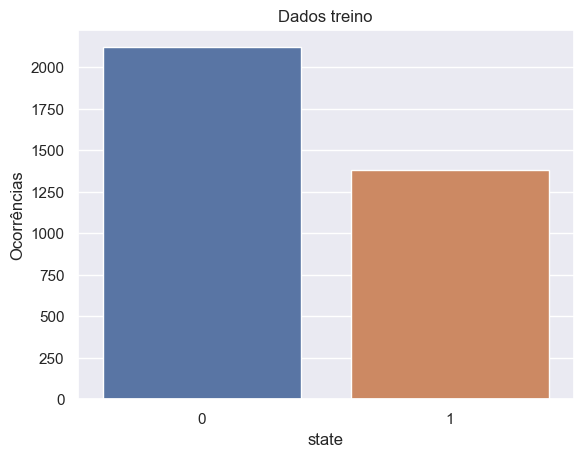

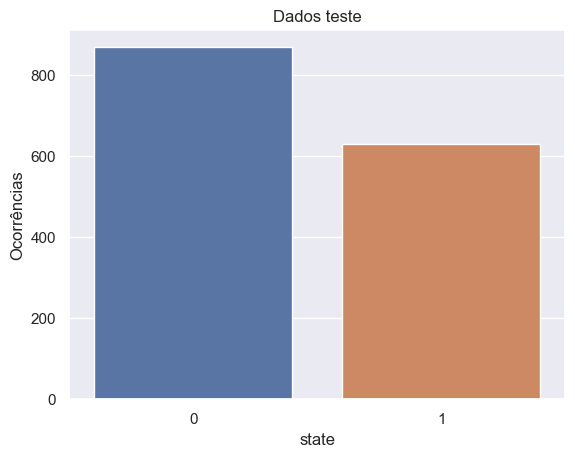

In [37]:
grafico_barras(y_train,'state','Dados treino','state','Ocorrências')
grafico_barras(y_test,'state','Dados teste','state','Ocorrências')

In [38]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier

In [40]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


In [60]:
def build_model(activation ='sigmoid', learning_rate = 0.01):
    model = Sequential()
    model.add(Dense(16, input_dim = 4, activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(1,activation = activation)) #output
    
    #Compile the model
    model.compile(
        loss = 'mae',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['mae','mse'])
    return model

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled = pd.DataFrame(scaler_x.transform(X[X.columns]), columns = X.columns)

In [62]:
X.head()

,pledged,backers,usd pledged,usd_pledged_real
372978,125.0,2,125.0,125.0
372979,120.0,3,120.0,120.0
372980,0.0,0,0.0,0.0
372981,1502.0,12,1502.0,1502.0
372983,25.0,1,25.0,25.0


In [63]:
X_scaled.head()

,pledged,backers,usd pledged,usd_pledged_real
0,0.000040,0.000082,0.000040,0.000040
1,0.000038,0.000123,0.000038,0.000038
2,0.000000,0.000000,0.000000,0.000000
3,0.000480,0.000493,0.000480,0.000480
4,0.000008,0.000041,0.000008,0.000008


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=2022)

In [53]:
optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer = optimizer)

In [54]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 2021)

In [58]:
build_model = build_model()
model = KerasRegressor(model = build_model, batch_size = 32, validation_split = 0.2, epochs = 20)

In [59]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring = 'neg_mean_absolute_error',refit = 'True', verbose = 1,error_score='raise',)
grid_search.fit(X_train,y_train)

INFO:tensorflow:Assets written to: ram://8010b5ce16ed4f1b9c8d2134d12c2425/assets


INFO:tensorflow:Assets written to: ram://8010b5ce16ed4f1b9c8d2134d12c2425/assets
2023-12-17 15:59:43.276488: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://d3c41c6ca99348219c786f48fa76e6da: INVALID_ARGUMENT: ram://d3c41c6ca99348219c786f48fa76e6da is a directory.


Fitting 5 folds for each of 3 candidates, totalling 15 fits


INFO:tensorflow:Assets written to: ram://c5b47a9e1980454099a3128fb5601343/assets


INFO:tensorflow:Assets written to: ram://c5b47a9e1980454099a3128fb5601343/assets


Epoch 1/20


2023-12-17 15:59:44.167722: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://6090972d41a64793a7d2d28caadc925c: INVALID_ARGUMENT: ram://6090972d41a64793a7d2d28caadc925c is a directory.


80/80 [==============================] - 1s 6ms/step - loss: 0.4016 - mae: 0.4016 - mse: 0.4016 - val_loss: 0.4156 - val_mae: 0.4156 - val_mse: 0.4156
Epoch 2/20
80/80 [==============================] - 0s 6ms/step - loss: 0.4016 - mae: 0.4016 - mse: 0.4016 - val_loss: 0.4156 - val_mae: 0.4156 - val_mse: 0.4156
Epoch 3/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4016 - mae: 0.4016 - mse: 0.4016 - val_loss: 0.4156 - val_mae: 0.4156 - val_mse: 0.4156
Epoch 4/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4016 - mae: 0.4016 - mse: 0.4016 - val_loss: 0.4156 - val_mae: 0.4156 - val_mse: 0.4156
Epoch 5/20
80/80 [==============================] - 0s 6ms/step - loss: 0.4016 - mae: 0.4016 - mse: 0.4016 - val_loss: 0.4156 - val_mae: 0.4156 - val_mse: 0.4156
Epoch 6/20
80/80 [==============================] - 1s 7ms/step - loss: 0.4016 - mae: 0.4016 - mse: 0.4016 - val_loss: 0.4156 - val_mae: 0.4156 - val_mse: 0.4156
Epoch 7/20
80/80 [=====================

INFO:tensorflow:Assets written to: ram://9f27f35eb0aa404587de851fed2a122d/assets


INFO:tensorflow:Assets written to: ram://9f27f35eb0aa404587de851fed2a122d/assets


Epoch 1/20


2023-12-17 15:59:56.985725: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://76972de55e1e4d5a8d5cd12c2cf9287a: INVALID_ARGUMENT: ram://76972de55e1e4d5a8d5cd12c2cf9287a is a directory.


80/80 [==============================] - 1s 8ms/step - loss: 0.4074 - mae: 0.4074 - mse: 0.4074 - val_loss: 0.4141 - val_mae: 0.4141 - val_mse: 0.4141
Epoch 2/20
80/80 [==============================] - 1s 7ms/step - loss: 0.4074 - mae: 0.4074 - mse: 0.4074 - val_loss: 0.4141 - val_mae: 0.4141 - val_mse: 0.4141
Epoch 3/20
80/80 [==============================] - 1s 7ms/step - loss: 0.4074 - mae: 0.4074 - mse: 0.4074 - val_loss: 0.4141 - val_mae: 0.4141 - val_mse: 0.4141
Epoch 4/20
80/80 [==============================] - 1s 10ms/step - loss: 0.4074 - mae: 0.4074 - mse: 0.4074 - val_loss: 0.4141 - val_mae: 0.4141 - val_mse: 0.4141
Epoch 5/20
80/80 [==============================] - 1s 7ms/step - loss: 0.4074 - mae: 0.4074 - mse: 0.4074 - val_loss: 0.4141 - val_mae: 0.4141 - val_mse: 0.4141
Epoch 6/20
80/80 [==============================] - 1s 9ms/step - loss: 0.4074 - mae: 0.4074 - mse: 0.4074 - val_loss: 0.4141 - val_mae: 0.4141 - val_mse: 0.4141
Epoch 7/20
80/80 [====================

INFO:tensorflow:Assets written to: ram://88ce28476c1b4a61895770731e652fad/assets


INFO:tensorflow:Assets written to: ram://88ce28476c1b4a61895770731e652fad/assets


Epoch 1/20


2023-12-17 16:00:10.573715: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://c33fe8c1e529452582fd0610c6e650a8: INVALID_ARGUMENT: ram://c33fe8c1e529452582fd0610c6e650a8 is a directory.


80/80 [==============================] - 1s 8ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4187 - val_mae: 0.4187 - val_mse: 0.4187
Epoch 2/20
80/80 [==============================] - 1s 8ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4187 - val_mae: 0.4187 - val_mse: 0.4187
Epoch 3/20
80/80 [==============================] - 1s 8ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4187 - val_mae: 0.4187 - val_mse: 0.4187
Epoch 4/20
80/80 [==============================] - 0s 6ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4187 - val_mae: 0.4187 - val_mse: 0.4187
Epoch 5/20
80/80 [==============================] - 1s 6ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4187 - val_mae: 0.4187 - val_mse: 0.4187
Epoch 6/20
80/80 [==============================] - 1s 6ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4187 - val_mae: 0.4187 - val_mse: 0.4187
Epoch 7/20
80/80 [=====================

INFO:tensorflow:Assets written to: ram://e54de54649c24a098918f71f175ee658/assets


INFO:tensorflow:Assets written to: ram://e54de54649c24a098918f71f175ee658/assets


Epoch 1/20


2023-12-17 16:00:32.412903: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://89814a9e4efd4d69af6f36347ad9e4b9: INVALID_ARGUMENT: ram://89814a9e4efd4d69af6f36347ad9e4b9 is a directory.


80/80 [==============================] - 1s 8ms/step - loss: 0.3953 - mae: 0.3953 - mse: 0.3953 - val_loss: 0.4406 - val_mae: 0.4406 - val_mse: 0.4406
Epoch 2/20
80/80 [==============================] - 1s 7ms/step - loss: 0.3953 - mae: 0.3953 - mse: 0.3953 - val_loss: 0.4406 - val_mae: 0.4406 - val_mse: 0.4406
Epoch 3/20
80/80 [==============================] - 1s 7ms/step - loss: 0.3953 - mae: 0.3953 - mse: 0.3953 - val_loss: 0.4406 - val_mae: 0.4406 - val_mse: 0.4406
Epoch 4/20
80/80 [==============================] - 0s 5ms/step - loss: 0.3953 - mae: 0.3953 - mse: 0.3953 - val_loss: 0.4406 - val_mae: 0.4406 - val_mse: 0.4406
Epoch 5/20
80/80 [==============================] - 0s 5ms/step - loss: 0.3953 - mae: 0.3953 - mse: 0.3953 - val_loss: 0.4406 - val_mae: 0.4406 - val_mse: 0.4406
Epoch 6/20
80/80 [==============================] - 1s 6ms/step - loss: 0.3953 - mae: 0.3953 - mse: 0.3953 - val_loss: 0.4406 - val_mae: 0.4406 - val_mse: 0.4406
Epoch 7/20
80/80 [=====================

INFO:tensorflow:Assets written to: ram://44c99d624c1d4e37b724cbe83258423c/assets


INFO:tensorflow:Assets written to: ram://44c99d624c1d4e37b724cbe83258423c/assets


Epoch 1/20


2023-12-17 16:00:45.133104: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://e1bb1e1ad8e5414a9764e5cba30e4e64: INVALID_ARGUMENT: ram://e1bb1e1ad8e5414a9764e5cba30e4e64 is a directory.


75/80 [===========================>..] - ETA: 0s - loss: 0.4033 - mae: 0.4033 - mse: 0.4033WARNING:tensorflow:Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


80/80 [==============================] - 1s 12ms/step - loss: 0.4047 - mae: 0.4047 - mse: 0.4047 - val_loss: 0.3922 - val_mae: 0.3922 - val_mse: 0.3922
Epoch 2/20
80/80 [==============================] - 1s 9ms/step - loss: 0.4047 - mae: 0.4047 - mse: 0.4047 - val_loss: 0.3922 - val_mae: 0.3922 - val_mse: 0.3922
Epoch 3/20
80/80 [==============================] - 1s 9ms/step - loss: 0.4047 - mae: 0.4047 - mse: 0.4047 - val_loss: 0.3922 - val_mae: 0.3922 - val_mse: 0.3922
Epoch 4/20
80/80 [==============================] - 1s 9ms/step - loss: 0.4047 - mae: 0.4047 - mse: 0.4047 - val_loss: 0.3922 - val_mae: 0.3922 - val_mse: 0.3922
Epoch 5/20
80/80 [==============================] - 1s 8ms/step - loss: 0.4047 - mae: 0.4047 - mse: 0.4047 - val_loss: 0.3922 - val_mae: 0.3922 - val_mse: 0.3922
Epoch 6/20
80/80 [==============================] - 1s 7ms/step - loss: 0.4047 - mae: 0.4047 - mse: 0.4047 - val_loss: 0.3922 - val_mae: 0.3922 - val_mse: 0.3922
Epoch 7/20
80/80 [====================

INFO:tensorflow:Assets written to: ram://a27cdd89c6e94582accf4becdaebdd19/assets


INFO:tensorflow:Assets written to: ram://a27cdd89c6e94582accf4becdaebdd19/assets


Epoch 1/20


2023-12-17 16:01:07.065553: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://3a9e6650181d4500a2d81b04b5e00b38: INVALID_ARGUMENT: ram://3a9e6650181d4500a2d81b04b5e00b38 is a directory.


80/80 [==============================] - 1s 7ms/step - loss: 0.4016 - mae: 0.4016 - mse: 0.4016 - val_loss: 0.4156 - val_mae: 0.4156 - val_mse: 0.4156
Epoch 2/20
80/80 [==============================] - 0s 6ms/step - loss: 0.4016 - mae: 0.4016 - mse: 0.4016 - val_loss: 0.4156 - val_mae: 0.4156 - val_mse: 0.4156
Epoch 3/20
80/80 [==============================] - 0s 6ms/step - loss: 0.4016 - mae: 0.4016 - mse: 0.4016 - val_loss: 0.4156 - val_mae: 0.4156 - val_mse: 0.4156
Epoch 4/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4016 - mae: 0.4016 - mse: 0.4016 - val_loss: 0.4156 - val_mae: 0.4156 - val_mse: 0.4156
Epoch 5/20
80/80 [==============================] - 0s 6ms/step - loss: 0.4016 - mae: 0.4016 - mse: 0.4016 - val_loss: 0.4156 - val_mae: 0.4156 - val_mse: 0.4156
Epoch 6/20
80/80 [==============================] - 0s 6ms/step - loss: 0.4016 - mae: 0.4016 - mse: 0.4016 - val_loss: 0.4156 - val_mae: 0.4156 - val_mse: 0.4156
Epoch 7/20
80/80 [=====================

INFO:tensorflow:Assets written to: ram://c28e3415b36041159dafa1b5a4ffb65b/assets


INFO:tensorflow:Assets written to: ram://c28e3415b36041159dafa1b5a4ffb65b/assets


Epoch 1/20


2023-12-17 16:01:18.425080: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://5ddf082e2cd74b919e03609c810aa9a2: INVALID_ARGUMENT: ram://5ddf082e2cd74b919e03609c810aa9a2 is a directory.


80/80 [==============================] - 1s 10ms/step - loss: 0.4074 - mae: 0.4074 - mse: 0.4074 - val_loss: 0.4141 - val_mae: 0.4141 - val_mse: 0.4141
Epoch 2/20
80/80 [==============================] - 1s 11ms/step - loss: 0.4074 - mae: 0.4074 - mse: 0.4074 - val_loss: 0.4141 - val_mae: 0.4141 - val_mse: 0.4141
Epoch 3/20
80/80 [==============================] - 1s 7ms/step - loss: 0.4074 - mae: 0.4074 - mse: 0.4074 - val_loss: 0.4141 - val_mae: 0.4141 - val_mse: 0.4141
Epoch 4/20
80/80 [==============================] - 1s 7ms/step - loss: 0.4074 - mae: 0.4074 - mse: 0.4074 - val_loss: 0.4141 - val_mae: 0.4141 - val_mse: 0.4141
Epoch 5/20
80/80 [==============================] - 1s 7ms/step - loss: 0.4074 - mae: 0.4074 - mse: 0.4074 - val_loss: 0.4141 - val_mae: 0.4141 - val_mse: 0.4141
Epoch 6/20
80/80 [==============================] - 1s 9ms/step - loss: 0.4074 - mae: 0.4074 - mse: 0.4074 - val_loss: 0.4141 - val_mae: 0.4141 - val_mse: 0.4141
Epoch 7/20
80/80 [===================

INFO:tensorflow:Assets written to: ram://aa99dd71a6f0498d9f2d7cca8bb175dc/assets


INFO:tensorflow:Assets written to: ram://aa99dd71a6f0498d9f2d7cca8bb175dc/assets


Epoch 1/20


2023-12-17 16:01:33.473718: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://b3c0913da15146029f2be0fb2850ad5f: INVALID_ARGUMENT: ram://b3c0913da15146029f2be0fb2850ad5f is a directory.


80/80 [==============================] - 1s 9ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4187 - val_mae: 0.4187 - val_mse: 0.4187
Epoch 2/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4187 - val_mae: 0.4187 - val_mse: 0.4187
Epoch 3/20
80/80 [==============================] - 1s 7ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4187 - val_mae: 0.4187 - val_mse: 0.4187
Epoch 4/20
80/80 [==============================] - 1s 11ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4187 - val_mae: 0.4187 - val_mse: 0.4187
Epoch 5/20
80/80 [==============================] - 0s 6ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4187 - val_mae: 0.4187 - val_mse: 0.4187
Epoch 6/20
80/80 [==============================] - 1s 6ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4187 - val_mae: 0.4187 - val_mse: 0.4187
Epoch 7/20
80/80 [====================

INFO:tensorflow:Assets written to: ram://aca680ba1c6e45e685632e21295910ad/assets


INFO:tensorflow:Assets written to: ram://aca680ba1c6e45e685632e21295910ad/assets


Epoch 1/20


2023-12-17 16:01:46.376020: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://19fe8aba8fbc4806b977820c62cef375: INVALID_ARGUMENT: ram://19fe8aba8fbc4806b977820c62cef375 is a directory.


80/80 [==============================] - 1s 6ms/step - loss: 0.3953 - mae: 0.3953 - mse: 0.3953 - val_loss: 0.4406 - val_mae: 0.4406 - val_mse: 0.4406
Epoch 2/20
80/80 [==============================] - 0s 6ms/step - loss: 0.3953 - mae: 0.3953 - mse: 0.3953 - val_loss: 0.4406 - val_mae: 0.4406 - val_mse: 0.4406
Epoch 3/20
80/80 [==============================] - 0s 6ms/step - loss: 0.3953 - mae: 0.3953 - mse: 0.3953 - val_loss: 0.4406 - val_mae: 0.4406 - val_mse: 0.4406
Epoch 4/20
80/80 [==============================] - 0s 5ms/step - loss: 0.3953 - mae: 0.3953 - mse: 0.3953 - val_loss: 0.4406 - val_mae: 0.4406 - val_mse: 0.4406
Epoch 5/20
80/80 [==============================] - 1s 6ms/step - loss: 0.3953 - mae: 0.3953 - mse: 0.3953 - val_loss: 0.4406 - val_mae: 0.4406 - val_mse: 0.4406
Epoch 6/20
80/80 [==============================] - 1s 8ms/step - loss: 0.3953 - mae: 0.3953 - mse: 0.3953 - val_loss: 0.4406 - val_mae: 0.4406 - val_mse: 0.4406
Epoch 7/20
80/80 [=====================

INFO:tensorflow:Assets written to: ram://362bbdef69f44aa98753e71625e08752/assets


INFO:tensorflow:Assets written to: ram://362bbdef69f44aa98753e71625e08752/assets


2023-12-17 16:01:59.452501: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://bb7bd0974d3b4e19b37a4c54e18d80af: INVALID_ARGUMENT: ram://bb7bd0974d3b4e19b37a4c54e18d80af is a directory.


Epoch 1/20
80/80 [==============================] - 1s 8ms/step - loss: 0.4047 - mae: 0.4047 - mse: 0.4047 - val_loss: 0.3922 - val_mae: 0.3922 - val_mse: 0.3922
Epoch 2/20
80/80 [==============================] - 1s 9ms/step - loss: 0.4047 - mae: 0.4047 - mse: 0.4047 - val_loss: 0.3922 - val_mae: 0.3922 - val_mse: 0.3922
Epoch 3/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4047 - mae: 0.4047 - mse: 0.4047 - val_loss: 0.3922 - val_mae: 0.3922 - val_mse: 0.3922
Epoch 4/20
80/80 [==============================] - 1s 8ms/step - loss: 0.4047 - mae: 0.4047 - mse: 0.4047 - val_loss: 0.3922 - val_mae: 0.3922 - val_mse: 0.3922
Epoch 5/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4047 - mae: 0.4047 - mse: 0.4047 - val_loss: 0.3922 - val_mae: 0.3922 - val_mse: 0.3922
Epoch 6/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4047 - mae: 0.4047 - mse: 0.4047 - val_loss: 0.3922 - val_mae: 0.3922 - val_mse: 0.3922
Epoch 7/20
80/80 [==========

INFO:tensorflow:Assets written to: ram://5eec2d72b24e4e28ab75621674a8f8b8/assets


INFO:tensorflow:Assets written to: ram://5eec2d72b24e4e28ab75621674a8f8b8/assets


Epoch 1/20


2023-12-17 16:02:21.272190: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://c81c4ecd98144008b368ac1c035da608: INVALID_ARGUMENT: ram://c81c4ecd98144008b368ac1c035da608 is a directory.


80/80 [==============================] - 1s 8ms/step - loss: 0.4016 - mae: 0.4016 - mse: 0.4016 - val_loss: 0.4156 - val_mae: 0.4156 - val_mse: 0.4156
Epoch 2/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4016 - mae: 0.4016 - mse: 0.4016 - val_loss: 0.4156 - val_mae: 0.4156 - val_mse: 0.4156
Epoch 3/20
80/80 [==============================] - 0s 6ms/step - loss: 0.4016 - mae: 0.4016 - mse: 0.4016 - val_loss: 0.4156 - val_mae: 0.4156 - val_mse: 0.4156
Epoch 4/20
80/80 [==============================] - 1s 7ms/step - loss: 0.4016 - mae: 0.4016 - mse: 0.4016 - val_loss: 0.4156 - val_mae: 0.4156 - val_mse: 0.4156
Epoch 5/20
80/80 [==============================] - 0s 6ms/step - loss: 0.4016 - mae: 0.4016 - mse: 0.4016 - val_loss: 0.4156 - val_mae: 0.4156 - val_mse: 0.4156
Epoch 6/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4016 - mae: 0.4016 - mse: 0.4016 - val_loss: 0.4156 - val_mae: 0.4156 - val_mse: 0.4156
Epoch 7/20
80/80 [=====================

INFO:tensorflow:Assets written to: ram://ba47e15f283e4ce1aec6cfd2c38e0735/assets


INFO:tensorflow:Assets written to: ram://ba47e15f283e4ce1aec6cfd2c38e0735/assets


Epoch 1/20


2023-12-17 16:02:32.977327: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://79699b8ce7e44e93a0f306c5615724cb: INVALID_ARGUMENT: ram://79699b8ce7e44e93a0f306c5615724cb is a directory.


80/80 [==============================] - 1s 7ms/step - loss: 0.4074 - mae: 0.4074 - mse: 0.4074 - val_loss: 0.4141 - val_mae: 0.4141 - val_mse: 0.4141
Epoch 2/20
80/80 [==============================] - 0s 4ms/step - loss: 0.4074 - mae: 0.4074 - mse: 0.4074 - val_loss: 0.4141 - val_mae: 0.4141 - val_mse: 0.4141
Epoch 3/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4074 - mae: 0.4074 - mse: 0.4074 - val_loss: 0.4141 - val_mae: 0.4141 - val_mse: 0.4141
Epoch 4/20
80/80 [==============================] - 1s 8ms/step - loss: 0.4074 - mae: 0.4074 - mse: 0.4074 - val_loss: 0.4141 - val_mae: 0.4141 - val_mse: 0.4141
Epoch 5/20
80/80 [==============================] - 1s 9ms/step - loss: 0.4074 - mae: 0.4074 - mse: 0.4074 - val_loss: 0.4141 - val_mae: 0.4141 - val_mse: 0.4141
Epoch 6/20
80/80 [==============================] - 1s 11ms/step - loss: 0.4074 - mae: 0.4074 - mse: 0.4074 - val_loss: 0.4141 - val_mae: 0.4141 - val_mse: 0.4141
Epoch 7/20
80/80 [====================

INFO:tensorflow:Assets written to: ram://503889bcd08b4506a0db9f8b98e777bd/assets


INFO:tensorflow:Assets written to: ram://503889bcd08b4506a0db9f8b98e777bd/assets


Epoch 1/20


2023-12-17 16:02:55.202362: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://1a981c006c914070b9e816e7fbe56385: INVALID_ARGUMENT: ram://1a981c006c914070b9e816e7fbe56385 is a directory.


80/80 [==============================] - 1s 11ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4187 - val_mae: 0.4187 - val_mse: 0.4187
Epoch 2/20
80/80 [==============================] - 1s 9ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4187 - val_mae: 0.4187 - val_mse: 0.4187
Epoch 3/20
80/80 [==============================] - 1s 9ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4187 - val_mae: 0.4187 - val_mse: 0.4187
Epoch 4/20
80/80 [==============================] - 1s 10ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4187 - val_mae: 0.4187 - val_mse: 0.4187
Epoch 5/20
80/80 [==============================] - 1s 12ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4187 - val_mae: 0.4187 - val_mse: 0.4187
Epoch 6/20
80/80 [==============================] - 1s 10ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4187 - val_mae: 0.4187 - val_mse: 0.4187
Epoch 7/20
80/80 [=================

INFO:tensorflow:Assets written to: ram://b483c33bc79743bc88e05b1912bb83ea/assets


INFO:tensorflow:Assets written to: ram://b483c33bc79743bc88e05b1912bb83ea/assets


Epoch 1/20


2023-12-17 16:03:08.707803: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://5867aba499e842c396a4f12a2364f8b1: INVALID_ARGUMENT: ram://5867aba499e842c396a4f12a2364f8b1 is a directory.


80/80 [==============================] - 1s 6ms/step - loss: 0.3953 - mae: 0.3953 - mse: 0.3953 - val_loss: 0.4406 - val_mae: 0.4406 - val_mse: 0.4406
Epoch 2/20
80/80 [==============================] - 0s 4ms/step - loss: 0.3953 - mae: 0.3953 - mse: 0.3953 - val_loss: 0.4406 - val_mae: 0.4406 - val_mse: 0.4406
Epoch 3/20
80/80 [==============================] - 0s 5ms/step - loss: 0.3953 - mae: 0.3953 - mse: 0.3953 - val_loss: 0.4406 - val_mae: 0.4406 - val_mse: 0.4406
Epoch 4/20
80/80 [==============================] - 0s 5ms/step - loss: 0.3953 - mae: 0.3953 - mse: 0.3953 - val_loss: 0.4406 - val_mae: 0.4406 - val_mse: 0.4406
Epoch 5/20
80/80 [==============================] - 0s 4ms/step - loss: 0.3953 - mae: 0.3953 - mse: 0.3953 - val_loss: 0.4406 - val_mae: 0.4406 - val_mse: 0.4406
Epoch 6/20
80/80 [==============================] - 1s 8ms/step - loss: 0.3953 - mae: 0.3953 - mse: 0.3953 - val_loss: 0.4406 - val_mae: 0.4406 - val_mse: 0.4406
Epoch 7/20
80/80 [=====================

INFO:tensorflow:Assets written to: ram://3806541e854c488c9084be417949990a/assets


INFO:tensorflow:Assets written to: ram://3806541e854c488c9084be417949990a/assets


Epoch 1/20


2023-12-17 16:03:20.760712: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://f7513ec098134fd485d44170b790abcc: INVALID_ARGUMENT: ram://f7513ec098134fd485d44170b790abcc is a directory.


80/80 [==============================] - 1s 7ms/step - loss: 0.4047 - mae: 0.4047 - mse: 0.4047 - val_loss: 0.3922 - val_mae: 0.3922 - val_mse: 0.3922
Epoch 2/20
80/80 [==============================] - 1s 8ms/step - loss: 0.4047 - mae: 0.4047 - mse: 0.4047 - val_loss: 0.3922 - val_mae: 0.3922 - val_mse: 0.3922
Epoch 3/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4047 - mae: 0.4047 - mse: 0.4047 - val_loss: 0.3922 - val_mae: 0.3922 - val_mse: 0.3922
Epoch 4/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4047 - mae: 0.4047 - mse: 0.4047 - val_loss: 0.3922 - val_mae: 0.3922 - val_mse: 0.3922
Epoch 5/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4047 - mae: 0.4047 - mse: 0.4047 - val_loss: 0.3922 - val_mae: 0.3922 - val_mse: 0.3922
Epoch 6/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4047 - mae: 0.4047 - mse: 0.4047 - val_loss: 0.3922 - val_mae: 0.3922 - val_mse: 0.3922
Epoch 7/20
80/80 [=====================

INFO:tensorflow:Assets written to: ram://6f966bf339f64af0ab12e1eecccb0291/assets


INFO:tensorflow:Assets written to: ram://6f966bf339f64af0ab12e1eecccb0291/assets
2023-12-17 16:03:32.477805: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://04e14d59fc044f83acffc6997ebaaa2f: INVALID_ARGUMENT: ram://04e14d59fc044f83acffc6997ebaaa2f is a directory.


INFO:tensorflow:Assets written to: ram://5918c88e3eb447dab57a169cd60bf384/assets


INFO:tensorflow:Assets written to: ram://5918c88e3eb447dab57a169cd60bf384/assets


Epoch 1/20


2023-12-17 16:03:33.178866: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://9efc49766acf4343931bcc33e382d7a4: INVALID_ARGUMENT: ram://9efc49766acf4343931bcc33e382d7a4 is a directory.


100/100 [==============================] - 1s 10ms/step - loss: 0.4022 - mae: 0.4022 - mse: 0.4022 - val_loss: 0.4162 - val_mae: 0.4162 - val_mse: 0.4162
Epoch 2/20
100/100 [==============================] - 1s 6ms/step - loss: 0.4022 - mae: 0.4022 - mse: 0.4022 - val_loss: 0.4162 - val_mae: 0.4162 - val_mse: 0.4162
Epoch 3/20
100/100 [==============================] - 1s 7ms/step - loss: 0.4022 - mae: 0.4022 - mse: 0.4022 - val_loss: 0.4162 - val_mae: 0.4162 - val_mse: 0.4162
Epoch 4/20
100/100 [==============================] - 1s 7ms/step - loss: 0.4022 - mae: 0.4022 - mse: 0.4022 - val_loss: 0.4162 - val_mae: 0.4162 - val_mse: 0.4162
Epoch 5/20
100/100 [==============================] - 1s 6ms/step - loss: 0.4022 - mae: 0.4022 - mse: 0.4022 - val_loss: 0.4162 - val_mae: 0.4162 - val_mse: 0.4162
Epoch 6/20
100/100 [==============================] - 1s 5ms/step - loss: 0.4022 - mae: 0.4022 - mse: 0.4022 - val_loss: 0.4162 - val_mae: 0.4162 - val_mse: 0.4162
Epoch 7/20
100/100 [======

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             error_score='raise',
             estimator=KerasRegressor(batch_size=32, epochs=20, model=<keras.engine.sequential.Sequential object at 0x7f3f2c113fa0>, validation_split=0.2),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             refit='True', scoring='neg_mean_absolute_error', verbose=1)

In [65]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

Best: -0.405000 using {'optimizer': 'SGD'}


In [66]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [67]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" %(mean, stdev,param))

-0.405000 (0.008551) with {'optimizer': 'SGD'}
-0.405000 (0.008551) with {'optimizer': 'RMSprop'}
-0.405000 (0.008551) with {'optimizer': 'Adagrad'}


In [68]:
best_mlp_model = grid_search.best_estimator_

In [69]:
best_mlp_model.fit(X_train, y_train, epochs =20, validation_data = (X_test, y_test), verbose =1)

Epoch 1/20
125/125 [==============================] - 1s 9ms/step - loss: 0.4050 - mae: 0.4050 - mse: 0.4050 - val_loss: 0.3910 - val_mae: 0.3910 - val_mse: 0.3910
Epoch 2/20
125/125 [==============================] - 1s 6ms/step - loss: 0.4050 - mae: 0.4050 - mse: 0.4050 - val_loss: 0.3910 - val_mae: 0.3910 - val_mse: 0.3910
Epoch 3/20
125/125 [==============================] - 1s 6ms/step - loss: 0.4050 - mae: 0.4050 - mse: 0.4050 - val_loss: 0.3910 - val_mae: 0.3910 - val_mse: 0.3910
Epoch 4/20
125/125 [==============================] - 1s 6ms/step - loss: 0.4050 - mae: 0.4050 - mse: 0.4050 - val_loss: 0.3910 - val_mae: 0.3910 - val_mse: 0.3910
Epoch 5/20
125/125 [==============================] - 1s 5ms/step - loss: 0.4050 - mae: 0.4050 - mse: 0.4050 - val_loss: 0.3910 - val_mae: 0.3910 - val_mse: 0.3910
Epoch 6/20
125/125 [==============================] - 1s 5ms/step - loss: 0.4050 - mae: 0.4050 - mse: 0.4050 - val_loss: 0.3910 - val_mae: 0.3910 - val_mse: 0.3910
Epoch 7/20
125/1

KerasRegressor(
	model=<keras.engine.sequential.Sequential object at 0x7f3f146eecb0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=SGD
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)

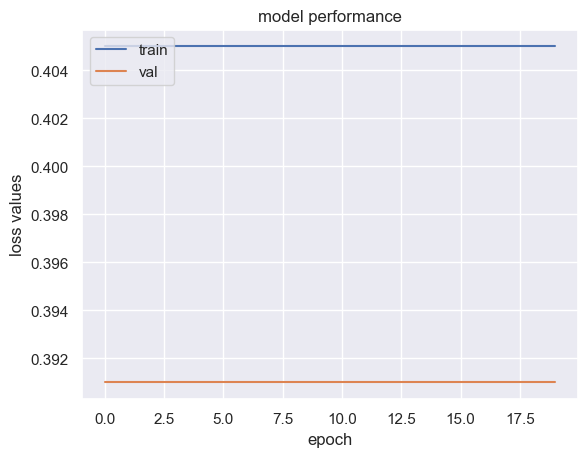

In [70]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

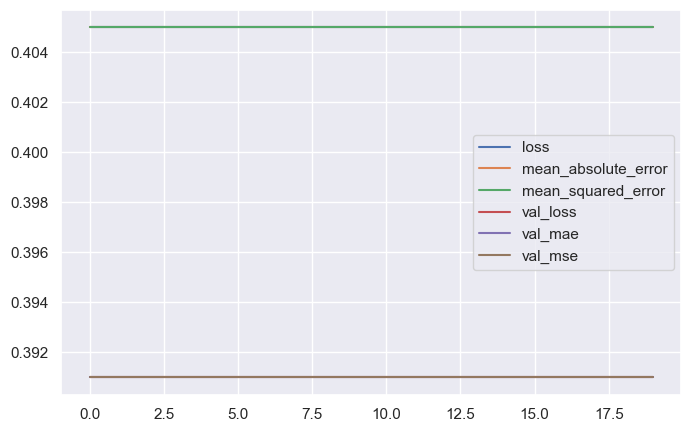

In [72]:
pd.DataFrame(best_mlp_model.history_).plot(figsize=(8,5))
plt.show()

In [73]:
prediction = best_mlp_model.predict(X_test)

32/32 [==============================] - 0s 4ms/step


In [74]:
from sklearn import metrics

In [75]:
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  0.391
MSE:  0.391
RMSE:  0.6252999280345393


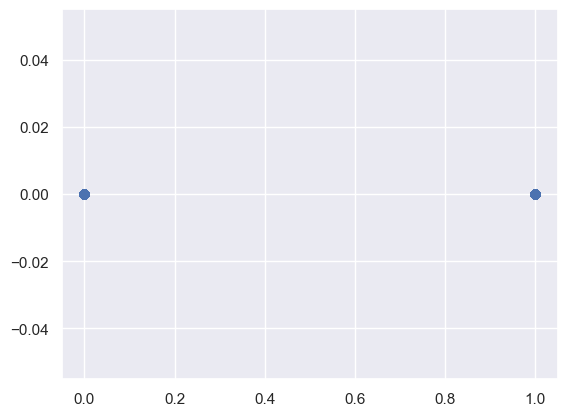

In [76]:
plt.scatter(y_test,prediction)

In [77]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test[:limit],color='green',label='Actual')
    plt.plot(prediction[:limit],color='red',label='Predicted')
    plt.grid(alpha=0.3)
    
    plt.title('Real x Predicted')
    plt.legend()
    plt.show()

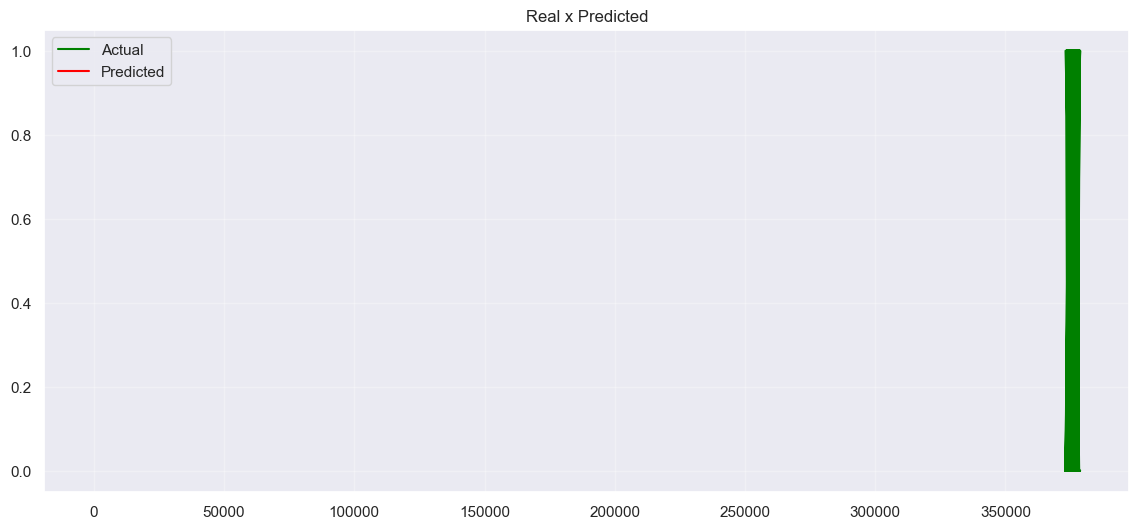

In [78]:
real_predicted_viz(200)